In [31]:
import pandas as pd
# Import confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
diabetes_df = pd.read_csv('diabetes_clean.csv')

In [23]:
knn = KNeighborsClassifier(n_neighbors=6)

X = diabetes_df.drop('diabetes', axis=1).values
y = diabetes_df['diabetes'].values

# Split the dataset and label into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44, stratify=y)
# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

In [24]:
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred ))
print(classification_report(y_test, y_pred))

[[128  22]
 [ 51  30]]
              precision    recall  f1-score   support

           0       0.72      0.85      0.78       150
           1       0.58      0.37      0.45        81

    accuracy                           0.68       231
   macro avg       0.65      0.61      0.61       231
weighted avg       0.67      0.68      0.66       231



LOGISTIC REGRESSION

In [25]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs[:10])

[0.02933622 0.22239934 0.23708024 0.10338712 0.38868175 0.0416069
 0.3179611  0.02215261 0.07978092 0.53459746]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Plot the ROC curve to visualize how the true positive rate and false positive rate vary as the decision threshold changes

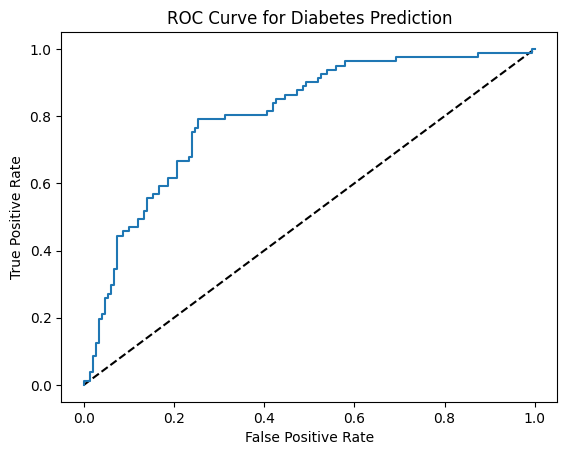

In [28]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

The model performs better than randomly guessing the class of each observation

In [29]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

0.8019753086419752
[[128  22]
 [ 51  30]]
              precision    recall  f1-score   support

           0       0.72      0.85      0.78       150
           1       0.58      0.37      0.45        81

    accuracy                           0.68       231
   macro avg       0.65      0.61      0.61       231
weighted avg       0.67      0.68      0.66       231



Logistic regression performs better than the KNN model across all the metrics you calculated

HYPERPARAMETER TUNING WITH GridSearchCV


In [34]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold

lasso = Lasso()
kf = KFold(n_splits=5, shuffle=True, random_state=44)

# Set up the parameter grid
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

# Instantiate lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train, y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

Tuned lasso paramaters: {'alpha': np.float64(1e-05)}
Tuned lasso score: 0.3033954475674244


HYPERPARAMETER TUNING WITH RandomizedSearchCV

In [36]:
from sklearn.model_selection import RandomizedSearchCV
# Create the parameter space
params = {"penalty": ["l1", "l2"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1.0, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}]}

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)

# Fit the data to the model
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'tol': np.float64(0.16334897959183672), 'penalty': 'l2', 'class_weight': {0: 0.8, 1: 0.2}, 'C': np.float64(0.9448979591836735)}
Tuned Logistic Regression Best Accuracy Score: 0.638785046728972


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver